In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
from scipy.sparse.linalg import cg, LinearOperator
import solver as slv
from scipy.signal import welch

In [2]:
noise_w=np.array(np.load('white_ml.npy')).astype(np.float64)
noise_r=np.array(np.load('red_ml.npy')).astype(np.float64)
noise_ex=np.array(np.load('ex_ml.npy')).astype(np.float64)
map=np.array(np.load('simulCMB.npy')).astype(np.float64)

In [3]:
noise_w.shape

(300, 300)

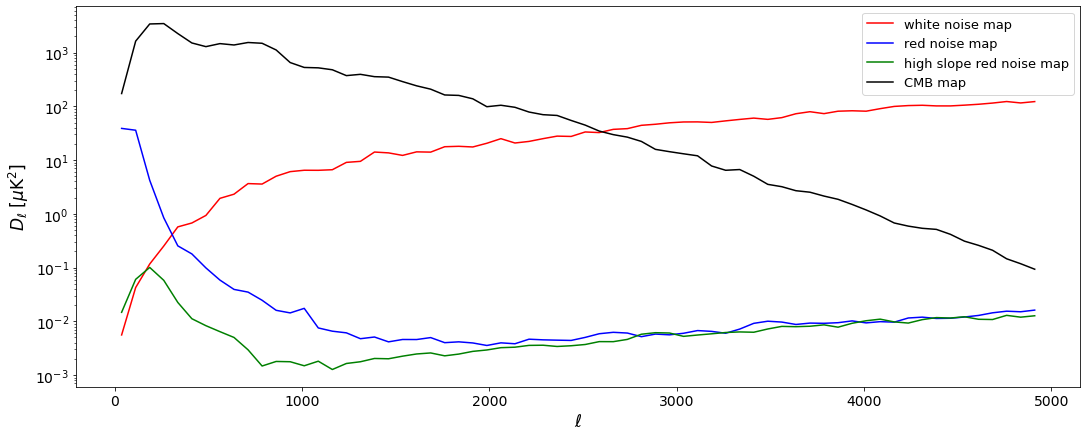

In [4]:
# check for solver's power spectrum capabilities
ell_w,dl_w=slv.ps_calc(noise_w,5,delta_ell=75)
ell_r,dl_r=slv.ps_calc(noise_r,5,delta_ell=75)
ell_ex,dl_ex=slv.ps_calc(noise_ex,5,delta_ell=75)
ell_cmb,dl_cmb=slv.ps_calc(map,5,delta_ell=75)
# plotting the power spectrum
plt.figure(figsize=(18,7))
plt.semilogy(ell_w,dl_w,'r',label='white noise map')
plt.semilogy(ell_r,dl_r,'b',label='red noise map')
plt.semilogy(ell_ex,dl_ex,'g',label='high slope red noise map')
plt.semilogy(ell_cmb,dl_cmb,'k',label='CMB map')
plt.xlabel('$\ell$',fontsize=17)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=13)


In [5]:
#loading the pysm3 maps
map100=np.load('pysm3_map100.npy')
map400=np.load('pysm3_map400.npy')
map800=np.load('pysm3_map800.npy')
map1200=np.load('pysm3_map1200.npy')

Text(0.5, 1.0, 'pysm3 map 1200x1200')

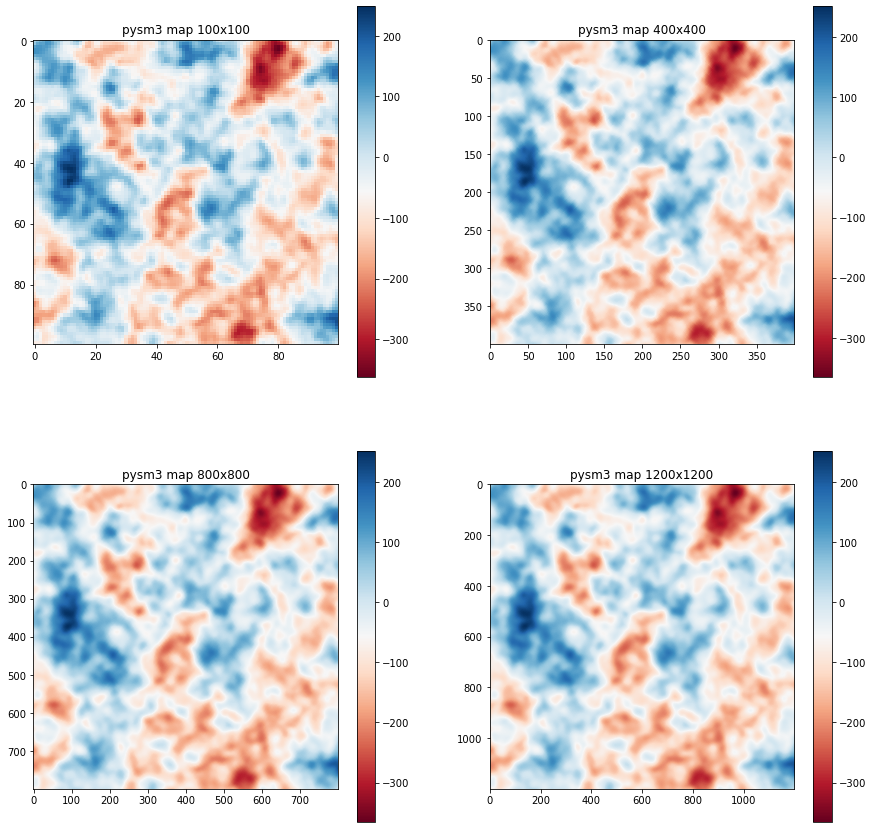

In [6]:
# plotting the pysm3 maps
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(map100,cmap='RdBu')
plt.colorbar()
plt.title('pysm3 map 100x100')
plt.subplot(222)
plt.imshow(map400,cmap='RdBu')
plt.colorbar()
plt.title('pysm3 map 400x400')
plt.subplot(223)
plt.imshow(map800,cmap='RdBu')
plt.colorbar()
plt.title('pysm3 map 800x800')
plt.subplot(224)
plt.imshow(map1200,cmap='RdBu')
plt.colorbar()
plt.title('pysm3 map 1200x1200')


Text(0.5, 1.0, 'Power spectrum of the pysm3 maps')

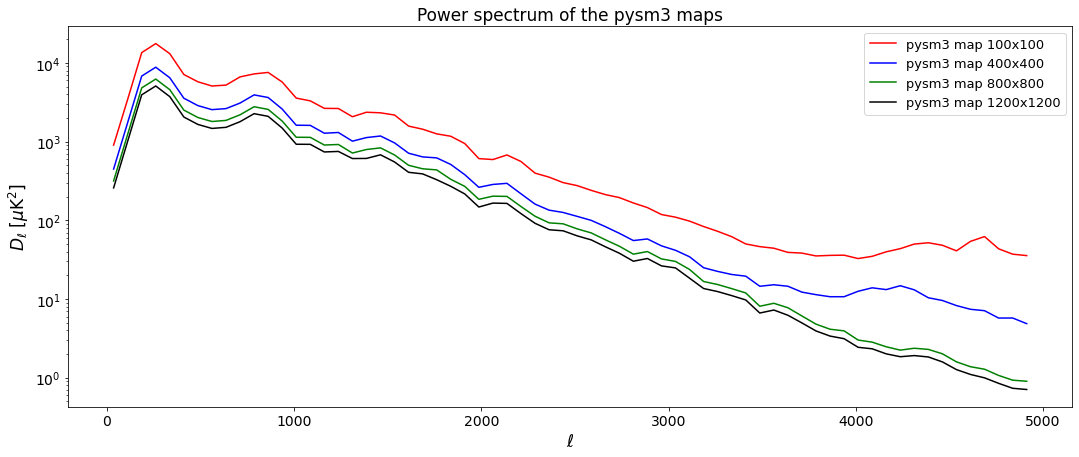

In [7]:
# Power spectrum of the pysm3 maps
bin_size=75
ell_100,dl_100=slv.ps_calc(map100,4,delta_ell=bin_size)
ell_400,dl_400=slv.ps_calc(map400,4,delta_ell=bin_size)
ell_800,dl_800=slv.ps_calc(map800,4,delta_ell=bin_size)
ell_1200,dl_1200=slv.ps_calc(map1200,4,delta_ell=bin_size)

# plotting the power spectrum
plt.figure(figsize=(18,7))
plt.semilogy(ell_100,dl_100,'r',label='pysm3 map 100x100')
plt.semilogy(ell_400,dl_400,'b',label='pysm3 map 400x400')
plt.semilogy(ell_800,dl_800,'g',label='pysm3 map 800x800')
plt.semilogy(ell_1200,dl_1200,'k',label='pysm3 map 1200x1200')
plt.xlabel('$\ell$',fontsize=17)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=13)
plt.title('Power spectrum of the pysm3 maps',fontsize=17)


In [8]:
# Create the MLsolver objects
mlsolver100 = slv.MLsolver(map100, 25)
mlsolver400 = slv.MLsolver(map400, 100)
mlsolver800 = slv.MLsolver(map800, 200)
mlsolver1200 = slv.MLsolver(map1200, 300)

# Call the ml_solver and map_w_noise methods
sol100w = mlsolver100.ml_solver(0, add_noise=True)
sol400w = mlsolver400.ml_solver(0, add_noise=True)
sol800w = mlsolver800.ml_solver(0, add_noise=True)
sol1200w = mlsolver1200.ml_solver(0, add_noise=True)

sol100r = mlsolver100.ml_solver(-3.5, add_noise=True)
sol400r = mlsolver400.ml_solver(-3.5, add_noise=True)
sol800r = mlsolver800.ml_solver(-3.5, add_noise=True)
sol1200r = mlsolver1200.ml_solver(-3.5, add_noise=True)



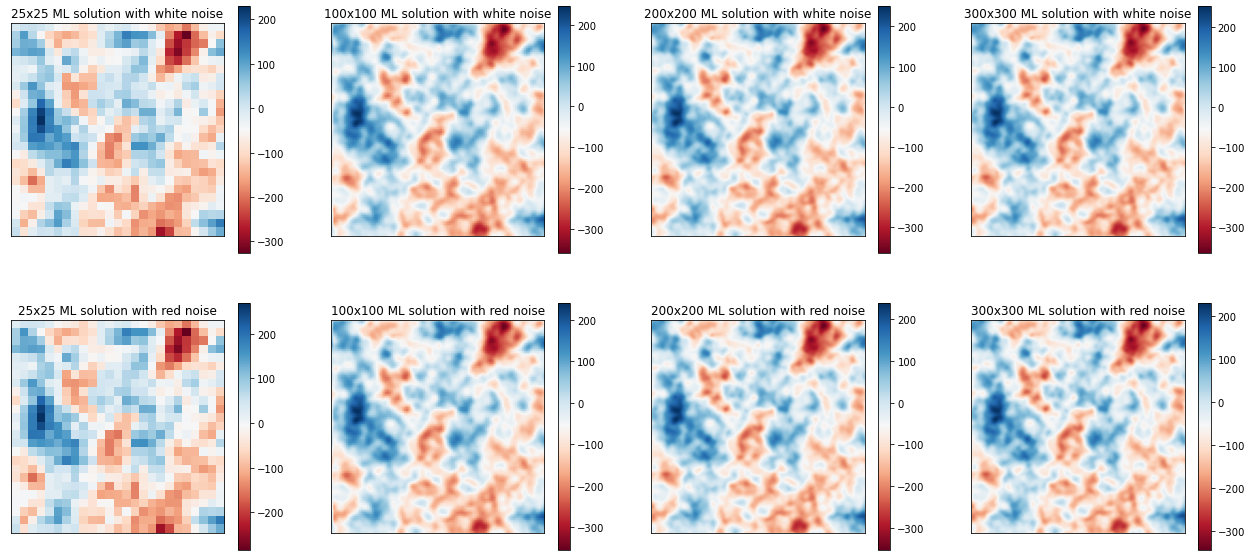

In [9]:
# List of solutions
solutions = [sol100w, sol400w, sol800w, sol1200w, sol100r, sol400r, sol800r, sol1200r]

# Corresponding titles
titles = ['25x25 ML solution with white noise', '100x100 ML solution with white noise',
          '200x200 ML solution with white noise', '300x300 ML solution with white noise',
          '25x25 ML solution with red noise', '100x100 ML solution with red noise',
          '200x200 ML solution with red noise', '300x300 ML solution with red noise']

plt.figure(figsize=(22,10))

# Loop over solutions and titles
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(solutions[i], cmap="RdBu")
    plt.title(titles[i])
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])

plt.show()

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Power spectrums of the ML solutions')

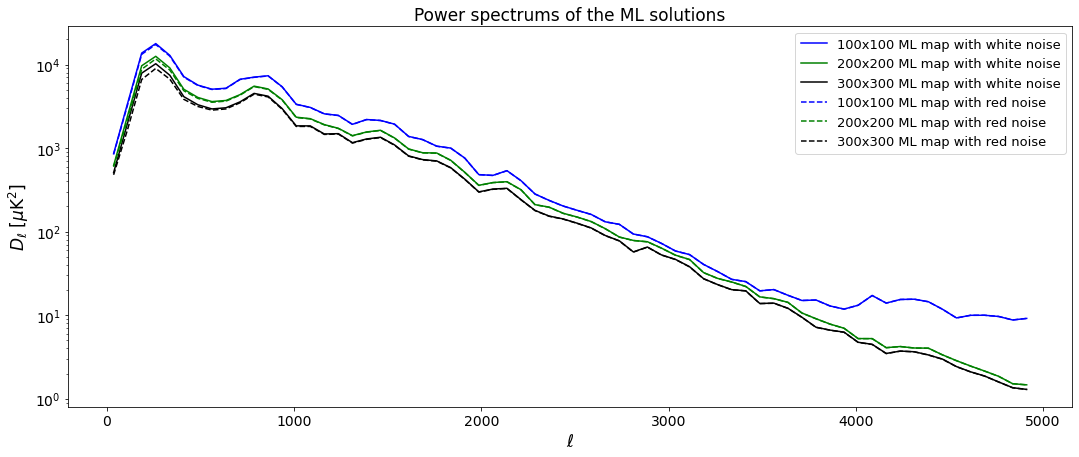

In [10]:
#power spectrum of the solutions
binning=75
ell_100w,dl_100w=slv.ps_calc(sol100w,4,delta_ell=binning)
ell_400w,dl_400w=slv.ps_calc(sol400w,4,delta_ell=binning)
ell_800w,dl_800w=slv.ps_calc(sol800w,4,delta_ell=binning)
ell_1200w,dl_1200w=slv.ps_calc(sol1200w,4,delta_ell=binning)
ell_100r,dl_100r=slv.ps_calc(sol100r,4,delta_ell=binning)
ell_400r,dl_400r=slv.ps_calc(sol400r,4,delta_ell=binning)
ell_800r,dl_800r=slv.ps_calc(sol800r,4,delta_ell=binning)
ell_1200r,dl_1200r=slv.ps_calc(sol1200r,4,delta_ell=binning)

#plotting the power spectrum
plt.figure(figsize=(18,7))
#plt.semilogy(ell_100w,dl_100w,'r',label='100x100 white noise map')
plt.semilogy(ell_400w,dl_400w,'b',label='100x100 ML map with white noise')
plt.semilogy(ell_800w,dl_800w,'g',label='200x200 ML map with white noise')
plt.semilogy(ell_1200w,dl_1200w,'k',label='300x300 ML map with white noise')
#plt.semilogy(ell_100r,dl_100r,'r--',label='100x100 red noise map')
plt.semilogy(ell_400r,dl_400r,'b--',label='100x100 ML map with red noise')
plt.semilogy(ell_800r,dl_800r,'g--',label='200x200 ML map with red noise')
plt.semilogy(ell_1200r,dl_1200r,'k--',label='300x300 ML map with red noise')
plt.xlabel('$\ell$',fontsize=17)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=13)
plt.title('Power spectrums of the ML solutions',fontsize=17)

## PS of pysm3 map added with noise 

Text(0.5, 1.0, 'Power spectrum of the pysm3 maps with noises')

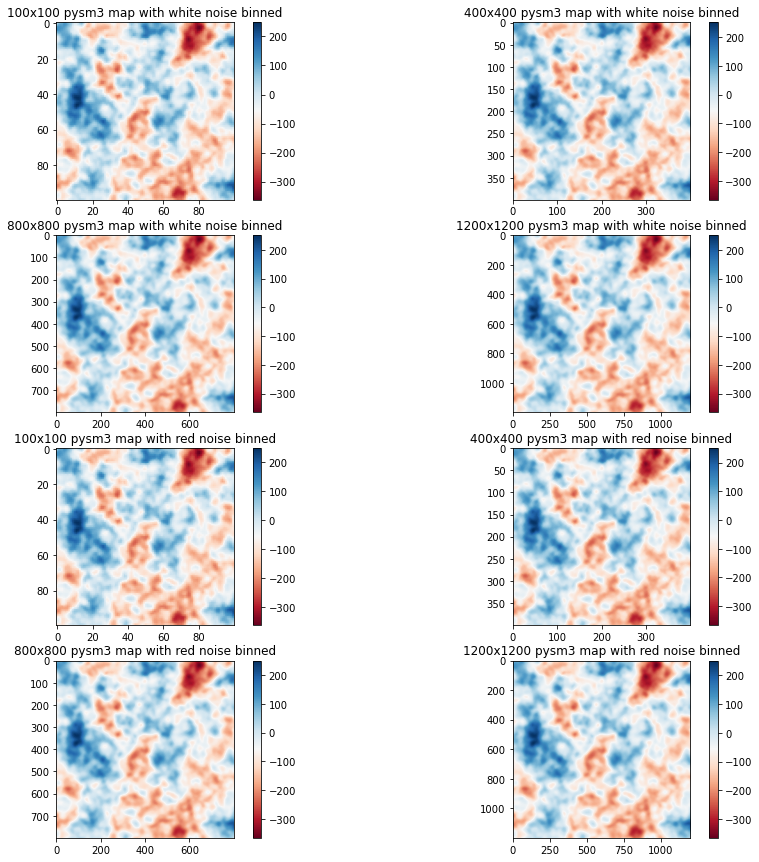

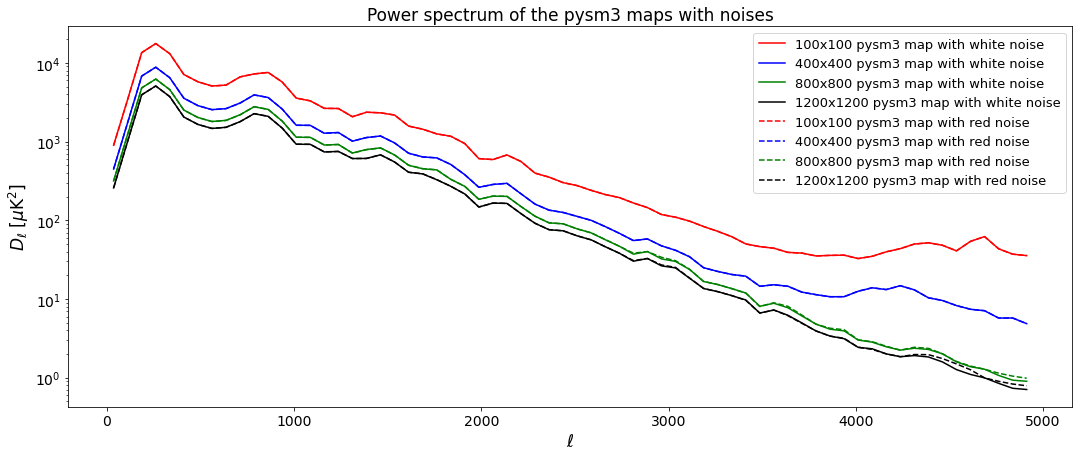

In [11]:

binning=75
wnoise_map100 = mlsolver100.map_w_noise(0)
wnoise_map400 = mlsolver400.map_w_noise(0)
wnoise_map800 = mlsolver800.map_w_noise(0)
wnoise_map1200 = mlsolver1200.map_w_noise(0)

rnoise_map100 = mlsolver100.map_w_noise(-3.5)
rnoise_map400 = mlsolver400.map_w_noise(-3.5)
rnoise_map800 = mlsolver800.map_w_noise(-3.5)
rnoise_map1200 = mlsolver1200.map_w_noise(-3.5)
# Power spectrum of the pysm3 maps with noises
ell_wnoise100,dl_wnoise100=slv.ps_calc(wnoise_map100,4,delta_ell=binning)
ell_wnoise400,dl_wnoise400=slv.ps_calc(wnoise_map400,4,delta_ell=binning)
ell_wnoise800,dl_wnoise800=slv.ps_calc(wnoise_map800,4,delta_ell=binning)
ell_wnoise1200,dl_wnoise1200=slv.ps_calc(wnoise_map1200,4,delta_ell=binning)
ell_rnoise100,dl_rnoise100=slv.ps_calc(rnoise_map100,4,delta_ell=binning)
ell_rnoise400,dl_rnoise400=slv.ps_calc(rnoise_map400,4,delta_ell=binning)
ell_rnoise800,dl_rnoise800=slv.ps_calc(rnoise_map800,4,delta_ell=binning)
ell_rnoise1200,dl_rnoise1200=slv.ps_calc(rnoise_map1200,4,delta_ell=binning)

#plotting the maps
plt.figure(figsize=(15,15))
plt.subplot(421)
plt.imshow(wnoise_map100,cmap='RdBu')
plt.colorbar()
plt.title('100x100 pysm3 map with white noise binned')
plt.subplot(422)
plt.imshow(wnoise_map400,cmap='RdBu')
plt.colorbar()
plt.title('400x400 pysm3 map with white noise binned')
plt.subplot(423)
plt.imshow(wnoise_map800,cmap='RdBu')
plt.colorbar()
plt.title('800x800 pysm3 map with white noise binned')
plt.subplot(424)
plt.imshow(wnoise_map1200,cmap='RdBu')
plt.colorbar()
plt.title('1200x1200 pysm3 map with white noise binned')
plt.subplot(425)
plt.imshow(rnoise_map100,cmap='RdBu')
plt.colorbar()
plt.title('100x100 pysm3 map with red noise binned')
plt.subplot(426)
plt.imshow(rnoise_map400,cmap='RdBu')
plt.colorbar()
plt.title('400x400 pysm3 map with red noise binned')
plt.subplot(427)
plt.imshow(rnoise_map800,cmap='RdBu')
plt.colorbar()
plt.title('800x800 pysm3 map with red noise binned')
plt.subplot(428)
plt.imshow(rnoise_map1200,cmap='RdBu')
plt.colorbar()
plt.title('1200x1200 pysm3 map with red noise binned')


#plotting the power spectrum
plt.figure(figsize=(18,7))
plt.semilogy(ell_wnoise100,dl_wnoise100,'r',label='100x100 pysm3 map with white noise')
plt.semilogy(ell_wnoise400,dl_wnoise400,'b',label='400x400 pysm3 map with white noise')
plt.semilogy(ell_wnoise800,dl_wnoise800,'g',label='800x800 pysm3 map with white noise')
plt.semilogy(ell_wnoise1200,dl_wnoise1200,'k',label='1200x1200 pysm3 map with white noise')
plt.semilogy(ell_rnoise100,dl_rnoise100,'r--',label='100x100 pysm3 map with red noise')
plt.semilogy(ell_rnoise400,dl_rnoise400,'b--',label='400x400 pysm3 map with red noise')
plt.semilogy(ell_rnoise800,dl_rnoise800,'g--',label='800x800 pysm3 map with red noise')
plt.semilogy(ell_rnoise1200,dl_rnoise1200,'k--',label='1200x1200 pysm3 map with red noise')
plt.xlabel('$\ell$',fontsize=17)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=13)
plt.title('Power spectrum of the pysm3 maps with noises',fontsize=17)



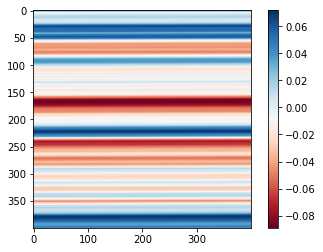

In [12]:
#noise=mlsolver400.noisemodel(-3.5)[1]/(np.mean((mlsolver400.noisemodel(-3.5)[1])**2))**0.5
noise=mlsolver400.noisemodel(-3.5)[1]/10
noise.shape
plt.plot(np.arange(len(noise)),noise)
noise_map=noise[0:noise.size//2].reshape(400,400)
plt.imshow(noise_map,cmap='RdBu')
plt.colorbar()

# White noise residual

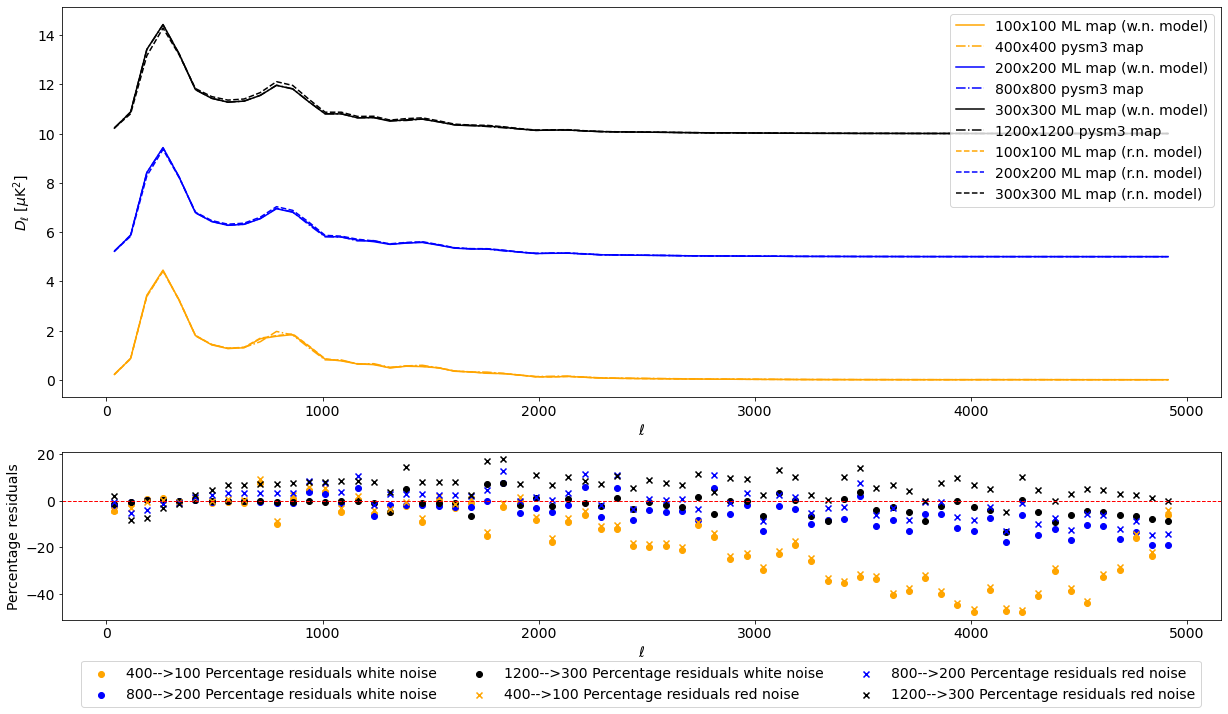

In [13]:
ellm400,dellm400=slv.ps_calc(map400,4,delta_ell=75)
ellm800,dellm800=slv.ps_calc(map800,4,delta_ell=75)
ellm1200,dellm1200=slv.ps_calc(map1200,4,delta_ell=75)

# normalized spectrums
normdellm400=dellm400/(np.mean(dellm400**2))**0.5
normdellm800=dellm800/(np.mean(dellm800**2))**0.5
normdellm1200=dellm1200/(np.mean(dellm1200**2))**0.5
normdl_400w=dl_400w/(np.mean(dl_400w**2))**0.5
normdl_800w=dl_800w/(np.mean(dl_800w**2))**0.5
normdl_1200w=dl_1200w/(np.mean(dl_1200w**2))**0.5
normdl_400r=dl_400r/(np.mean(dl_400r**2))**0.5
normdl_800r=dl_800r/(np.mean(dl_800r**2))**0.5
normdl_1200r=dl_1200r/(np.mean(dl_1200r**2))**0.5

# Percentage residuals with different noise model solutions
resw400=(normdl_400w-normdellm400)/normdellm400*100
resw800=(normdl_800w-normdellm800)/normdellm800*100
resw1200=(normdl_1200w-normdellm1200)/normdellm1200*100
resr400=(normdl_400r-normdellm400)/normdellm400*100
resr800=(normdl_800r-normdellm800)/normdellm800*100
resr1200=(normdl_1200r-normdellm1200)/normdellm1200*100


# Create a figure
fig = plt.figure(figsize=(18,10))

# Define the grid
gs = gridspec.GridSpec(3, 1)

# Create the first subplot
ax1 = fig.add_subplot(gs[:2, :])
ax1.tick_params(axis='y', labelsize=14)  # Change the size of the y-axis ticks
ax1.tick_params(axis='x', labelsize=14)  # Change the size of the x-axis ticks
ax1.plot(ellm400,normdl_400w,label='100x100 ML map (w.n. model)',c='orange')
ax1.plot(ellm400,normdellm400,label='400x400 pysm3 map',ls='-.',c='orange')
ax1.plot(ellm800,normdl_800w+5,label='200x200 ML map (w.n. model)',c='blue')
ax1.plot(ellm800,normdellm800+5,label='800x800 pysm3 map',ls='-.',c='blue')
ax1.plot(ellm1200,normdl_1200w+10,label='300x300 ML map (w.n. model)',c='black')
ax1.plot(ellm1200,normdellm1200+10,label='1200x1200 pysm3 map',ls='-.',c='black')
ax1.plot(ellm400,normdl_400r,label='100x100 ML map (r.n. model)',c='orange',ls='--')
ax1.plot(ellm800,normdl_800r+5,label='200x200 ML map (r.n. model)',c='blue',ls='--')
ax1.plot(ellm1200,normdl_1200r+10,label='300x300 ML map (r.n. model)',c='black',ls='--')
ax1.set_xlabel('$\ell$',fontsize=14)
ax1.set_ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=14)
ax1.legend(fontsize=14)

# Create the second subplot
ax2 = fig.add_subplot(gs[2, :])
ax2.tick_params(axis='y', labelsize=14)  # Change the size of the y-axis ticks
ax2.tick_params(axis='x', labelsize=14)  # Change the size of the x-axis ticks
ax2.scatter(ellm400,resw400,label='400-->100 Percentage residuals white noise',c='orange')
ax2.scatter(ellm800,resw800,label='800-->200 Percentage residuals white noise',c='blue')
ax2.scatter(ellm1200,resw1200,label='1200-->300 Percentage residuals white noise',c='black')
ax2.scatter(ellm400,resr400,label='400-->100 Percentage residuals red noise',c='orange',marker='x')
ax2.scatter(ellm800,resr800,label='800-->200 Percentage residuals red noise',c='blue',marker='x')
ax2.scatter(ellm1200,resr1200,label='1200-->300 Percentage residuals red noise',c='black',marker='x')
ax2.axhline(0, color='r', lw=1, ls='--')
ax2.set_xlabel('$\ell$',fontsize=14)
ax2.set_ylabel('Percentage residuals',fontsize=14)
ax2.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)


# Show the plots
plt.tight_layout()
plt.show()

## Testing for realistic white noise (From Choi et al. 2020)

In [14]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
from scipy.sparse.linalg import cg, LinearOperator
import solver as slv
from scipy.signal import welch
#loading the pysm3 maps
map100=np.load('pysm3_map100.npy')
map400=np.load('pysm3_map400.npy')
map800=np.load('pysm3_map800.npy')
map1200=np.load('pysm3_map1200.npy')

Text(0.5, 1.0, 'Power Spectral Density of the noise')

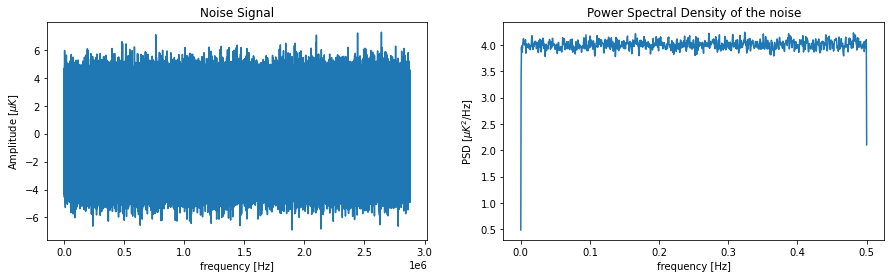

In [15]:
# Create the MLsolver objects
ml400=slv.MLsolver(map1200,300,1)
noise400=ml400.noisemodel(0)[1]

#calculate the power spectral density of the noise
f, Pxx = welch(noise400, fs=1, nperseg=2048,window='hamming')
#plot the power spectral density
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(np.arange(len(noise400)),noise400)
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitude [$\u03BCK$]')
plt.title('Noise Signal')
plt.subplot(122)
plt.plot(f, Pxx)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [$\u03BCK^2$/Hz]')
plt.title('Power Spectral Density of the noise')





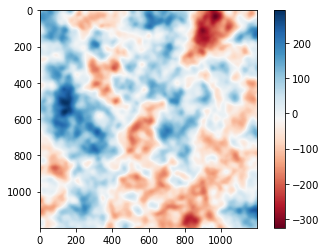

In [18]:
meanrem1200=map1200-np.mean(map1200)
meanrem400=map400-np.mean(map400)
meanrem800=map800-np.mean(map800)
ml_mr400=slv.MLsolver(meanrem400,100)
ml_mr800=slv.MLsolver(meanrem800,200)
ml_mr1200=slv.MLsolver(meanrem1200,300)



In [29]:
np.save('meanrem400.npy',meanrem400)
np.save('meanrem800.npy',meanrem800)
np.save('meanrem1200.npy',meanrem1200)

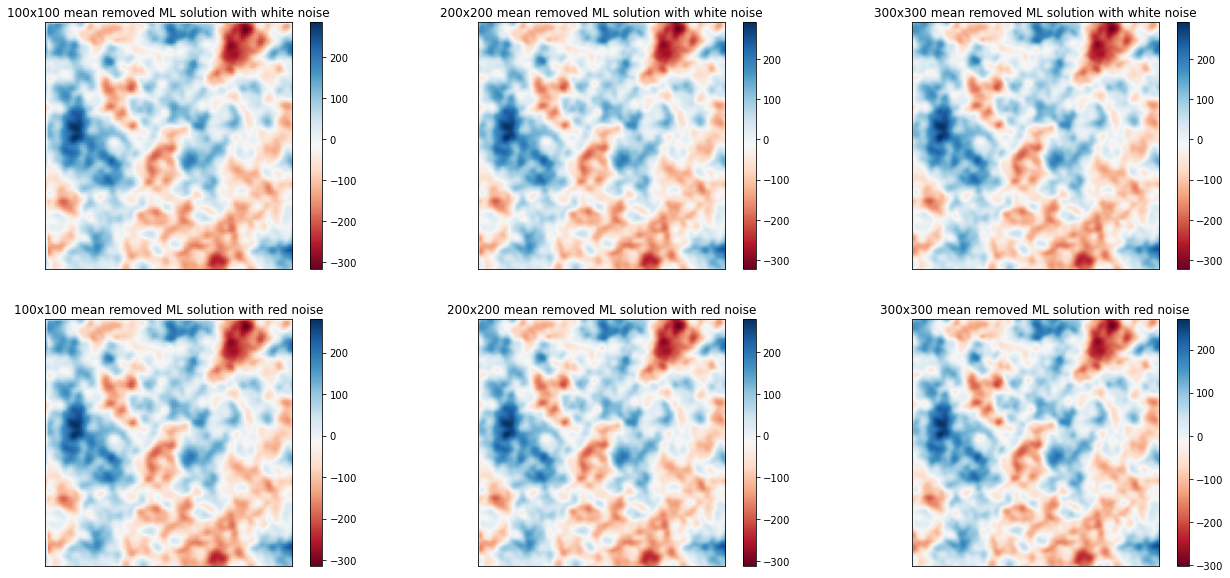

In [24]:
# ML solutions of the maps with the mean removed
sol_mr400w = ml_mr400.ml_solver(0)
sol_mr800w = ml_mr800.ml_solver(0)
sol_mr1200w = ml_mr1200.ml_solver(0)

sol_mr400r = ml_mr400.ml_solver(-3.5)
sol_mr800r = ml_mr800.ml_solver(-3.5)
sol_mr1200r = ml_mr1200.ml_solver(-3.5)

# Plotting the solutions together
solutions_mr = [sol_mr400w, sol_mr800w, sol_mr1200w, sol_mr400r, sol_mr800r, sol_mr1200r]
titles_mr = ['100x100 mean removed ML solution with white noise', '200x200 mean removed ML solution with white noise',
          '300x300 mean removed ML solution with white noise', '100x100 mean removed ML solution with red noise',
          '200x200 mean removed ML solution with red noise', '300x300 mean removed ML solution with red noise']

plt.figure(figsize=(22,10))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(solutions_mr[i], cmap="RdBu")
    plt.title(titles_mr[i])
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
plt.show()





In [25]:
# power spectrums of the mean removed maps
binning=75
mrell_400,mrdl_400=slv.ps_calc(meanrem400,4,delta_ell=binning)
mrell_800,mrdl_800=slv.ps_calc(meanrem800,4,delta_ell=binning)
mrell_1200,mrdl_1200=slv.ps_calc(meanrem1200,4,delta_ell=binning)

Text(0.5, 1.0, 'Power spectrums of the mean removed ML solutions')

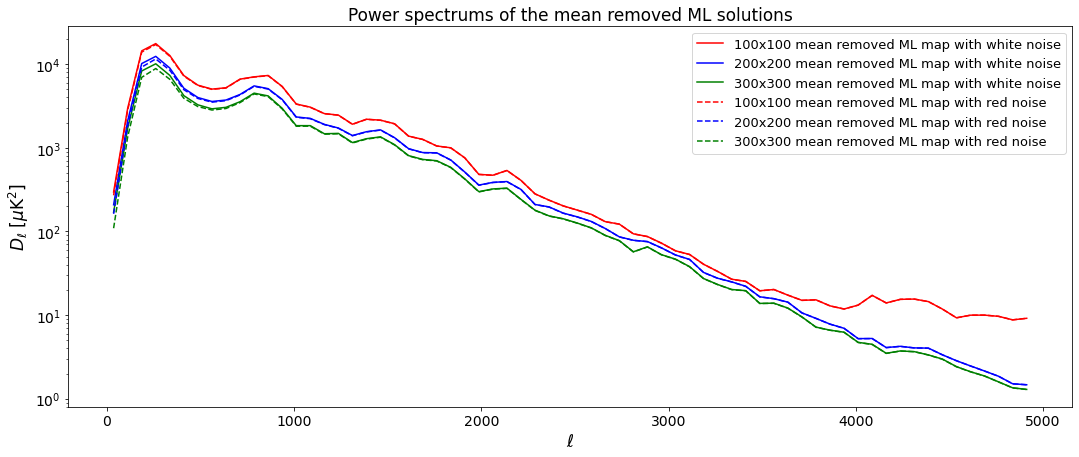

In [22]:
#power spectrum of the solutions
binning=75
ell_mr400w,dl_mr400w=slv.ps_calc(sol_mr400w,4,delta_ell=binning)
ell_mr800w,dl_mr800w=slv.ps_calc(sol_mr800w,4,delta_ell=binning)
ell_mr1200w,dl_mr1200w=slv.ps_calc(sol_mr1200w,4,delta_ell=binning)
ell_mr400r,dl_mr400r=slv.ps_calc(sol_mr400r,4,delta_ell=binning)
ell_mr800r,dl_mr800r=slv.ps_calc(sol_mr800r,4,delta_ell=binning)
ell_mr1200r,dl_mr1200r=slv.ps_calc(sol_mr1200r,4,delta_ell=binning)

#plotting the power spectrum
plt.figure(figsize=(18,7))
plt.semilogy(ell_mr400w,dl_mr400w,'r',label='100x100 mean removed ML map with white noise')
plt.semilogy(ell_mr800w,dl_mr800w,'b',label='200x200 mean removed ML map with white noise')
plt.semilogy(ell_mr1200w,dl_mr1200w,'g',label='300x300 mean removed ML map with white noise')
plt.semilogy(ell_mr400r,dl_mr400r,'r--',label='100x100 mean removed ML map with red noise')
plt.semilogy(ell_mr800r,dl_mr800r,'b--',label='200x200 mean removed ML map with red noise')
plt.semilogy(ell_mr1200r,dl_mr1200r,'g--',label='300x300 mean removed ML map with red noise')
plt.xlabel('$\ell$',fontsize=17)
plt.ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=17)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=13)
plt.title('Power spectrums of the mean removed ML solutions',fontsize=17)


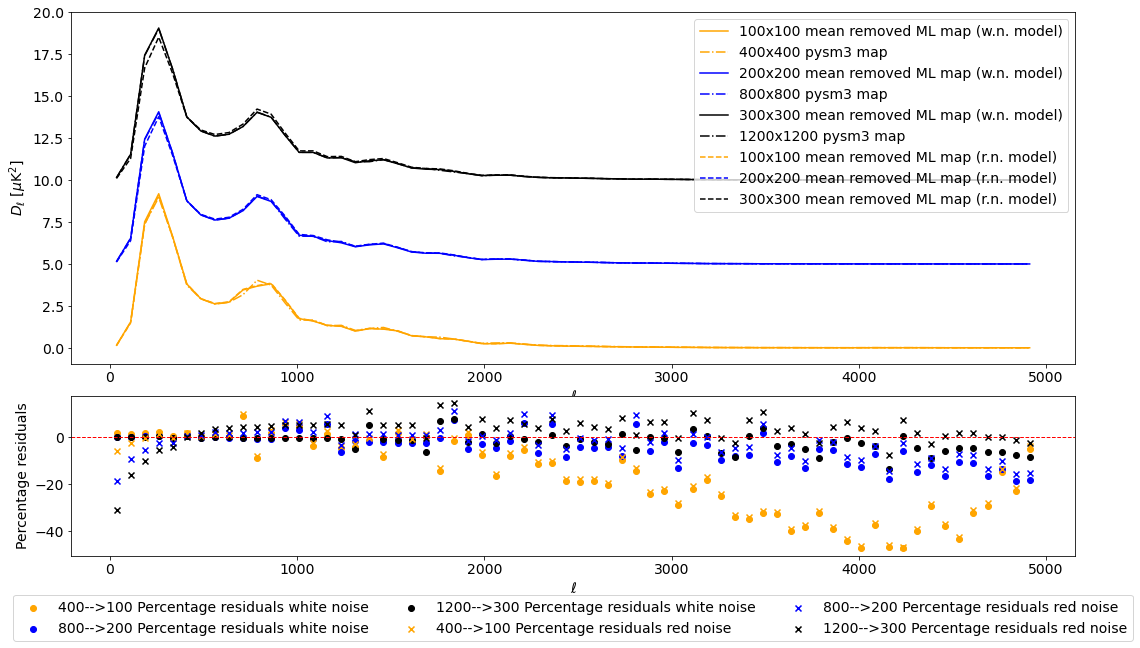

In [27]:
#normalized (by mean) power spectrum of mean removed maps and ML solutions
normdellm400=mrdl_400/(np.mean(mrdl_400))
normdellm800=mrdl_800/(np.mean(mrdl_800))
normdellm1200=mrdl_1200/(np.mean(mrdl_1200))
normdl_mr400w=dl_mr400w/(np.mean(dl_mr400w))
normdl_mr800w=dl_mr800w/(np.mean(dl_mr800w))
normdl_mr1200w=dl_mr1200w/(np.mean(dl_mr1200w))
normdl_mr400r=dl_mr400r/(np.mean(dl_mr400r))
normdl_mr800r=dl_mr800r/(np.mean(dl_mr800r))
normdl_mr1200r=dl_mr1200r/(np.mean(dl_mr1200r))

# Percentage residuals with different noise model solutions
resmr400w=(normdl_mr400w-normdellm400)/normdellm400*100
resmr800w=(normdl_mr800w-normdellm800)/normdellm800*100
resmr1200w=(normdl_mr1200w-normdellm1200)/normdellm1200*100
resmr400r=(normdl_mr400r-normdellm400)/normdellm400*100
resmr800r=(normdl_mr800r-normdellm800)/normdellm800*100
resmr1200r=(normdl_mr1200r-normdellm1200)/normdellm1200*100


# Create a figure
fig = plt.figure(figsize=(18,10))

# Define the grid
gs = gridspec.GridSpec(3, 1)

# Create the first subplot
ax1 = fig.add_subplot(gs[:2, :])
ax1.tick_params(axis='y', labelsize=14)  # Change the size of the y-axis ticks
ax1.tick_params(axis='x', labelsize=14)  # Change the size of the x-axis ticks
ax1.plot(ellm400,normdl_mr400w,label='100x100 mean removed ML map (w.n. model)',c='orange')
ax1.plot(ellm400,normdellm400,label='400x400 pysm3 map',ls='-.',c='orange')
ax1.plot(ellm800,normdl_mr800w+5,label='200x200 mean removed ML map (w.n. model)',c='blue')
ax1.plot(ellm800,normdellm800+5,label='800x800 pysm3 map',ls='-.',c='blue')
ax1.plot(ellm1200,normdl_mr1200w+10,label='300x300 mean removed ML map (w.n. model)',c='black')
ax1.plot(ellm1200,normdellm1200+10,label='1200x1200 pysm3 map',ls='-.',c='black')
ax1.plot(ellm400,normdl_mr400r,label='100x100 mean removed ML map (r.n. model)',c='orange',ls='--')
ax1.plot(ellm800,normdl_mr800r+5,label='200x200 mean removed ML map (r.n. model)',c='blue',ls='--')
ax1.plot(ellm1200,normdl_mr1200r+10,label='300x300 mean removed ML map (r.n. model)',c='black',ls='--')
ax1.set_xlabel('$\ell$',fontsize=14)
ax1.set_ylabel('$D_{\ell}$ [$\mu$K$^2$]',fontsize=14)
ax1.legend(fontsize=14)

# Create the second subplot
ax2 = fig.add_subplot(gs[2, :])
ax2.tick_params(axis='y', labelsize=14)  # Change the size of the y-axis ticks
ax2.tick_params(axis='x', labelsize=14)  # Change the size of the x-axis ticks
ax2.scatter(ellm400,resmr400w,label='400-->100 Percentage residuals white noise',c='orange')
ax2.scatter(ellm800,resmr800w,label='800-->200 Percentage residuals white noise',c='blue')
ax2.scatter(ellm1200,resmr1200w,label='1200-->300 Percentage residuals white noise',c='black')
ax2.scatter(ellm400,resmr400r,label='400-->100 Percentage residuals red noise',c='orange',marker='x')
ax2.scatter(ellm800,resmr800r,label='800-->200 Percentage residuals red noise',c='blue',marker='x')
ax2.scatter(ellm1200,resmr1200r,label='1200-->300 Percentage residuals red noise',c='black',marker='x')
ax2.axhline(0, color='r', lw=1, ls='--')
ax2.set_xlabel('$\ell$',fontsize=14)
ax2.set_ylabel('Percentage residuals',fontsize=14)
ax2.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)



